In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

1. Introduction
2. Cleaning of data
3. Exploration
4. Model
5. Conclusion

# Load modules for coding

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification

# Load datasets

In [7]:
# train = pd.read_csv("/kaggle/input/cat-in-the-dat/train.csv")
# test = pd.read_csv("/kaggle/input/cat-in-the-dat/test.csv")
# sample_submission = pd.read_csv("/kaggle/input/cat-in-the-dat/sample_submission.csv")

In [9]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
sample_submission = pd.read_csv("../data/sample_submission.csv")

The train set was splitted into 2 datasets.

In [11]:
train_X, test_X, train_y, test_y = train_test_split(train, train["target"], test_size = 0.15, random_state = 123)
print("train : {}".format(train.shape))
print("train_X : {}, train_y : {}".format(train_X.shape, train_y.shape))
print("test_X : {}, test_y : {}".format(test_X.shape, test_y.shape))

train : (300000, 25)
train_X : (255000, 25), train_y : (255000,)
test_X : (45000, 25), test_y : (45000,)


Transforming the two binary variables as bynary.

In [12]:
train["bin_3"] = [1 if x == "T" else 0 for x in train["bin_3"]]
train["bin_4"] = [1 if x == "Y" else 0 for x in train["bin_4"]]

In [13]:
# barplot of counts of days
def barplot_date(dat):
    data = pd.DataFrame({'COUNT' : train.groupby(["target",dat])[dat].agg("count")}).reset_index()
    
    labels = data[dat].unique()
    present = data.COUNT[data.target==1].values
    absent = data.COUNT[data.target==0].values
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, present, width, label='present')
    rects2 = ax.bar(x + width/2, absent, width, label='absent')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Count')
    ax.set_xlabel(dat)
    ax.set_title('Count by presence/absent of cat')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    autolabel(rects1)
    autolabel(rects2)
    
    fig.tight_layout()
    #plt.show()
    return plt

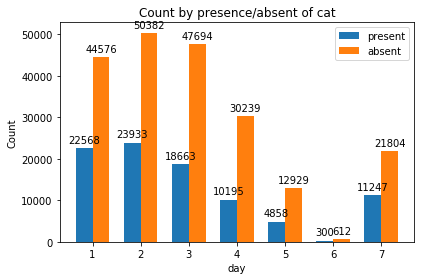

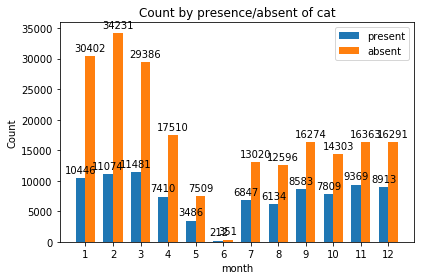

In [14]:
# barplot of day
_ = barplot_date("day")

# barplot of month
_ = barplot_date("month")

Bar plot...

In [15]:
def __getCountsPlot__(dat_dummies, title, figsize=(10,10), ascending=True):
    res = dat_dummies.sum(axis=0)
    res = res.to_frame()
    res.columns = ['Count']
    res = res.sort_values(by='Count',ascending=ascending)[:50]
    
    plt.figure(dpi=90, figsize=figsize)
    plt.bar(x=res.index, height=res.Count, align='center')
    plt.xticks(rotation=85, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.ylabel('# occurences', fontsize = 18)
    plt.title(title,color='b', fontsize = 18)

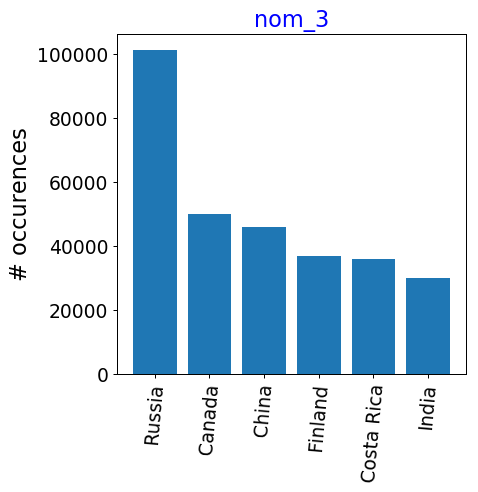

In [16]:
x = pd.Series(train['nom_3'])
x_ = x.str.get_dummies()

__getCountsPlot__(x_, "nom_3", (5,5), False)

pie plot

In [17]:
### Distribution of Countries ###
def get_pie(data, column_name, title, figsize=(5, 5)):
    count_id = []
    count_id=data[["id",column_name]]
    count_id.drop_duplicates(inplace=True)
    count_id=count_id.groupby([column_name]).agg('count')
    count_id.reset_index(inplace=True)
    count_id.columns=[column_name,"Count"]
    count_id.sort_values("Count", inplace=True)
    
    x = np.arange(count_id.shape[0])
    ys = [i+x+(i*x)**2 for i in range(count_id.shape[0])]
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    
    plt.rc('font', weight='bold')
    f, ax = plt.subplots(figsize=figsize, dpi=90)
    labels=count_id[column_name].values
    sizes=count_id.Count.values
    
    explode = [0.9 if sizes[i] < 3 else 0.0 for i in range(len(sizes))]
    ax.pie(sizes, explode = explode, labels=labels, colors = colors,
           autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
           shadow = False, startangle=0, textprops={'fontsize': 10})
    ax.axis('equal')
    ax.set_title(title, bbox={'facecolor':'blue', 'pad':5}, color = 'w', fontsize=7)

C:\Users\HAZRAK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


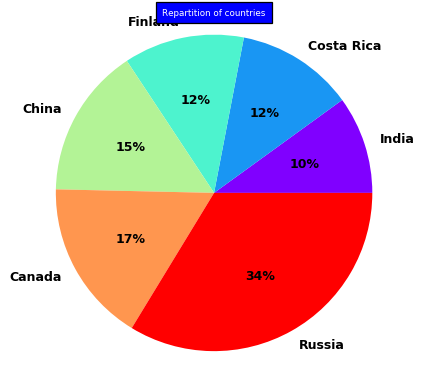

In [18]:
get_pie(data=train, column_name="nom_3", title="Repartition of countries")

C:\Users\HAZRAK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


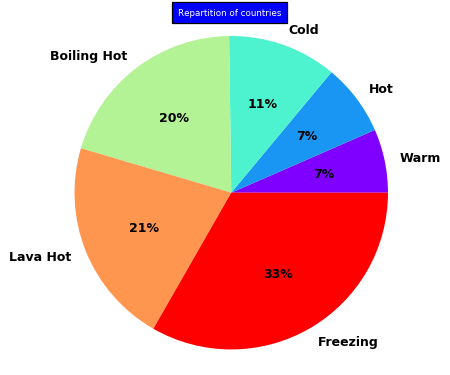

In [19]:
get_pie(data=train, column_name="ord_2", title="Repartition of countries")

# Logistic regression

In [23]:
from  sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn import metrics
class logisticRegression:
    def __init__(self,data,seed,random_sample):
        self.random_sample = random_sample
        self.seed = seed
        
        self.data = data.sample(frac=self.random_sample, replace=False, random_state=self.seed)
        
        self.lr=None
        self.pred_train=None
        self.pred_test=None
    def split(self, test_size):
        self.test_size = test_size
        train_X, test_X, train_y, test_y = train_test_split(self.data,self.data['target'], test_size = test_size, random_state=self.seed)
        self.train_X = train_X.drop(columns=['target'])
        self.test_X = test_X.drop(columns=['target'])
        self.train_y = train_y
        self.test_y = test_y
    def model(self,n_jobs,cv,regul):
        self.regul = regul
        if regul=='none':
            n_iters = np.array([50, 200])
            model = linear_model.SGDClassifier(loss='log', random_state=0, penalty=self.regul)
            grid = GridSearchCV(estimator=model, param_grid=dict(n_iter=n_iters), scoring='roc_auc', n_jobs=n_jobs, cv=cv, verbose=1)
            grid.fit(self.train_X,self.train_y)
            self.lr = grid
        elif regul=='elasticnet':
            n_iters = np.array([50, 200])
            alphas = np.logspace(-5, 1, 5)
            l1_ratios = np.array([0, 0.15, 0.3, 0.4, 0.5, 0.6, 0.85, 1])
            model = linear_model.SGDClassifier(loss='log', random_state=0, penalty=self.regul,n_iter=100,max_iter=100)
            grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas,l1_ratio=l1_ratios), scoring='roc_auc', n_jobs=n_jobs, cv=cv, verbose=1)
            grid.fit(self.train_X,self.train_y)
            self.lr = grid
        return self.lr
    def predict(self):
        self.pred_train = self.lr.best_estimator_.predict(X=self.train_X)
        self.pred_test = self.lr.best_estimator_.predict(X=self.test_X)
    def get_AUC(self):
        self.train_auc=metrics.roc_auc_score(y_score=self.lr.best_estimator_.predict_proba(X=self.train_X)[:,1], y_true=self.train_y)
        self.test_auc=metrics.roc_auc_score(y_score=self.lr.best_estimator_.predict_proba(X=self.test_X)[:,1], y_true=self.test_y)
        return (self.train_auc,self.test_auc)
    ### get contingency table + recall precision + roc curve !!!
    def boxplot(self):
        plt.figure()
        plt.subplot(1,2,1)
        sns.boxplot(x=self.train_y.values, y=self.lr.best_estimator_.predict_proba(X=self.train_X.values)[:,1])
        plt.title('Train')
        plt.subplot(1,2,2)
        sns.boxplot(x=self.test_y.values, y=self.lr.best_estimator_.predict_proba(X=self.test_X.values)[:,1])
        plt.title('Test')
        return plt
    def rocCurve(self):
        plt.figure()
        plt.subplot(1,2,1)
        fpr, tpr, thresholds = metrics.roc_curve(y_score=self.lr.best_estimator_.predict_proba(X=self.train_X)[:,1], y_true=self.train_y)
        plt.plot(fpr, tpr,'r')
        plt.plot([0,1],[0,1],'b')
        plt.title('Train, AUC: {}'.format(round(metrics.auc(fpr,tpr),3)))
        
        plt.subplot(1,2,2)
        fpr, tpr, thresholds = metrics.roc_curve(y_score=self.lr.best_estimator_.predict_proba(X=self.test_X)[:,1], y_true=self.test_y)
        plt.plot(fpr, tpr,'r')
        plt.plot([0,1],[0,1],'b')
        plt.title('Test, AUC: {}'.format(round(metrics.auc(fpr,tpr),3)))
        return plt
    def confusion(self,set_):
        if set_ == "train":
            res = metrics.confusion_matrix(y_true=self.train_y,y_pred=self.pred_train)
        elif set_ == "test":
            res = metrics.confusion_matrix(y_true=self.test_y,y_pred=self.pred_test)
        return res
    def getAccuracy(self):
        res=(metrics.accuracy_score(y_true=self.train_y,y_pred=self.pred_train),
            metrics.accuracy_score(y_true=self.test_y,y_pred=self.pred_test))
        return res
    def getClassificationReport(self,set_):
        if set_ == "train":
            res = metrics.classification_report(self.train_y, self.pred_train)
        elif set_ == "test":
            res = metrics.classification_report(self.test_y, self.pred_test)
        return res

In [33]:
dat_1 = pd.Series(train['ord_2'])
dat_1 = dat_1.str.get_dummies()
dat_2 = pd.Series(train['month'].apply(str))
dat_2 = dat_2.str.get_dummies()
dat_1[['m'+str(m) for m in dat_2.columns]] = dat_2

dat_3 = pd.Series(train['day'].apply(str))
dat_3 = dat_3.str.get_dummies()
dat_1[['d'+str(d) for d in dat_3.columns]] = dat_3

dat_4 = pd.Series(train['ord_5'])
dat_4 = dat_4.str.get_dummies()
dat_1[dat_4.columns] = dat_4

dat_5 = pd.Series(train['nom_3'])
dat_5 = dat_5.str.get_dummies()
dat_1[dat_5.columns] = dat_5

dat_1['target'] = train['target'].values
dat_1.head()

,Boiling Hot,Cold,Freezing,Hot,Lava Hot,Warm,m1,m10,m11,m12,...,yY,yc,zU,Canada,China,Costa Rica,Finland,India,Russia,target
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
lr = logisticRegression(data=dat_1,seed=123,random_sample=1)
lr.split(0.2)
lr.model(cv=3,n_jobs=6,regul="elasticnet")
lr.predict()

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  9.2min
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed: 21.8min finished
C:\Users\HAZRAK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


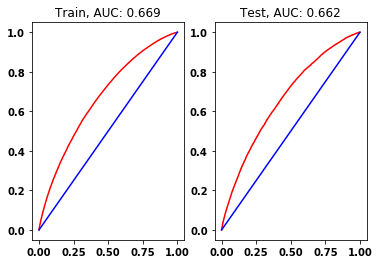

In [41]:
_ = lr.rocCurve()

In [42]:
lr.lr.best_params_

{'alpha': 0.00031622776601683794, 'l1_ratio': 0.0}

In [28]:
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = 10
X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(
    X_train, y_train, test_size=0.5)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
                          random_state=0)

rt_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder(categories='auto')
rf_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder(categories='auto')
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

C:\Users\HAZRAK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


TypeError: __init__() got an unexpected keyword argument 'categories'